In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [3]:
reviews_df = pd.read_csv("C:\\Users\\medep\\Downloads\\archive (25)\\cleaned_makeup_reviews.csv")
products_df = pd.read_csv("C:\\Users\\medep\\Downloads\\archive (25)\\cleaned_makeup_products.csv")

C:\Users\medep\AppData\Local\Temp\ipykernel_21312\2522793305.py:1: DtypeWarning: Columns (15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv("C:\\Users\\medep\\Downloads\\archive (25)\\cleaned_makeup_reviews.csv")


In [4]:
print(reviews_df.head())
print(products_df.head())

   unique_review_id  product_link_id  review_id   type           id  ugc_id  \
0                 1                8  521867580  image  521867563.0     NaN   
1                 2                8  485614895  image  485614799.0     NaN   
2                 3                8  485250956  image  485250927.0     NaN   
3                 4                8  485086522  video  485086531.0     NaN   
4                 5                8  482905142  image  482905180.0     NaN   

   legacy_id  internal_review_id                    headline    nickname  ...  \
0        NaN                  -1                  2C3 Fresco      Dinara  ...   
1        NaN                  -1               Glowing Skin!     Stephie  ...   
2        NaN                  -1                     Love it   Cgbanks30  ...   
3        NaN                  -1  Horrible allergic reaction       Genny  ...   
4        NaN                  -1          Futurist Skin tint  Santro3822  ...   

  locale location  bottom_line  produc

In [5]:
basic_stopwords = set([
    "a", "an", "the", "and", "or", "in", "on", "at", "to", "of", "for", "with", 
    "is", "are", "was", "were", "be", "been", "has", "have", "it", "this", "that", 
    "by", "as", "from", "but", "if", "not", "so", "up", "out", "about", "into", 
    "over", "after", "before", "below", "above", "between", "while", "during", 
    "without", "against", "among", "through", "within", "which", "when", "where"
])

In [6]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    words = text.split()
    words = [word for word in words if word not in basic_stopwords]
    return " ".join(words)

# Apply preprocessing to comments in reviews
reviews_df['processed_comments'] = reviews_df['comments'].fillna("").apply(preprocess_text)

In [7]:
def plot_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(str(data))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis('off')
    plt.show()

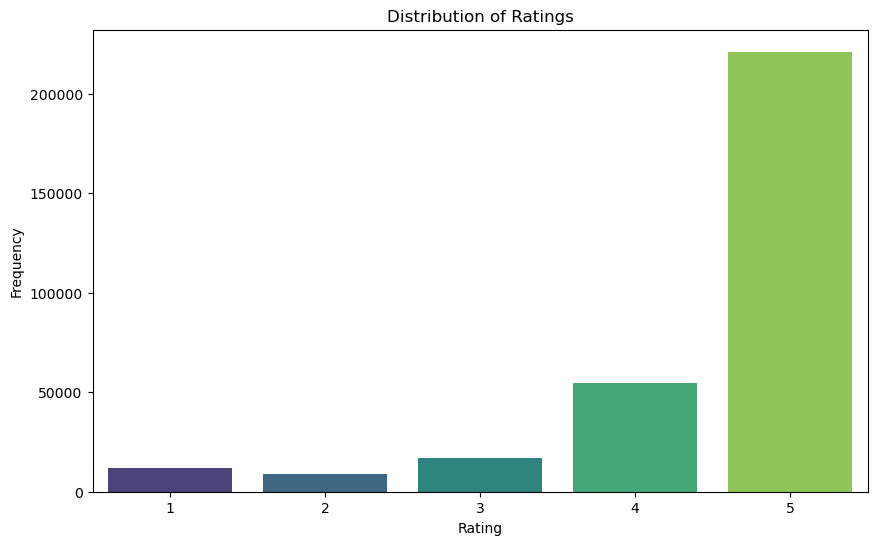

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=reviews_df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

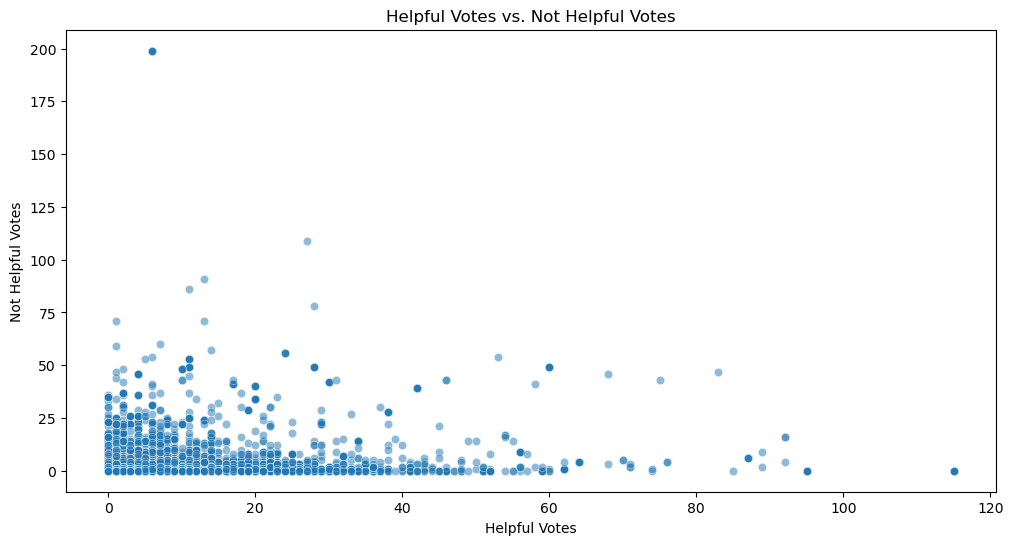

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='helpful_votes', y='not_helpful_votes', data=reviews_df, alpha=0.5)
plt.title('Helpful Votes vs. Not Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Not Helpful Votes')
plt.show()

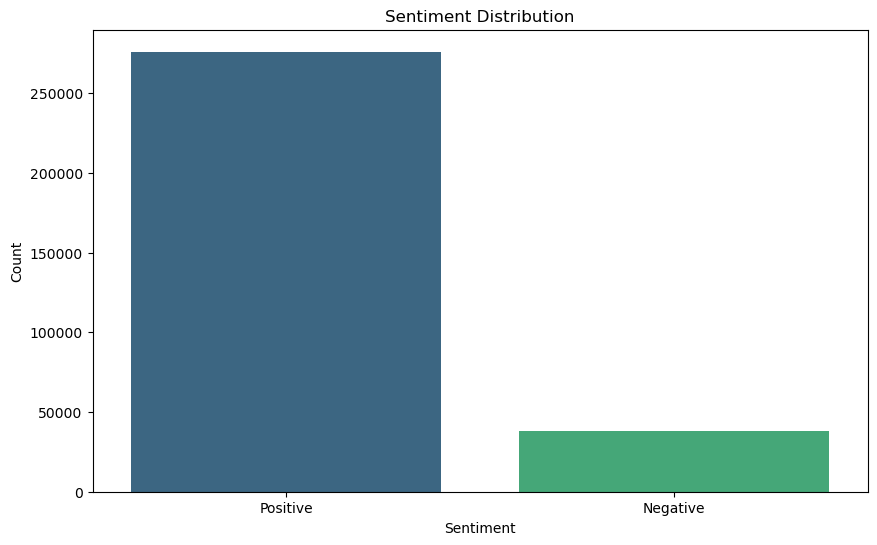

In [13]:
reviews_df['sentiment'] = reviews_df['rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=reviews_df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

C:\Users\medep\Downloads\Navigator\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


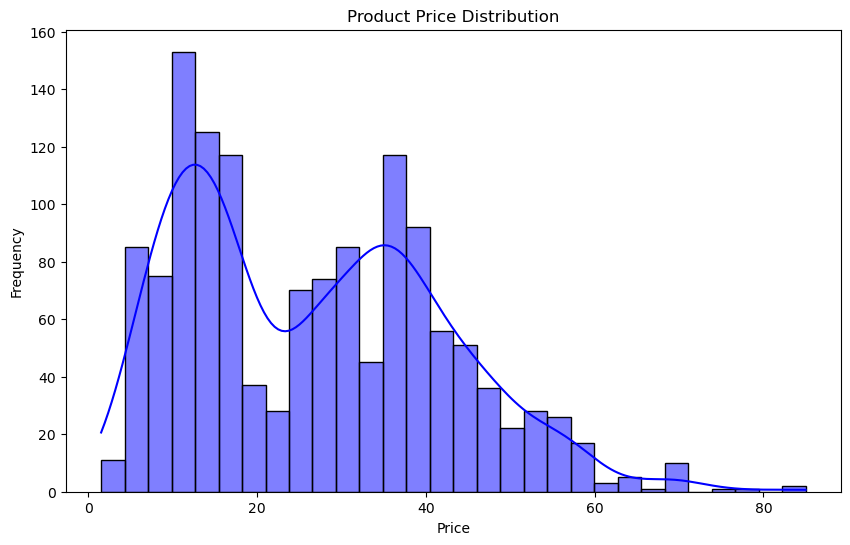

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(products_df['price'], bins=30, kde=True, color='blue')
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

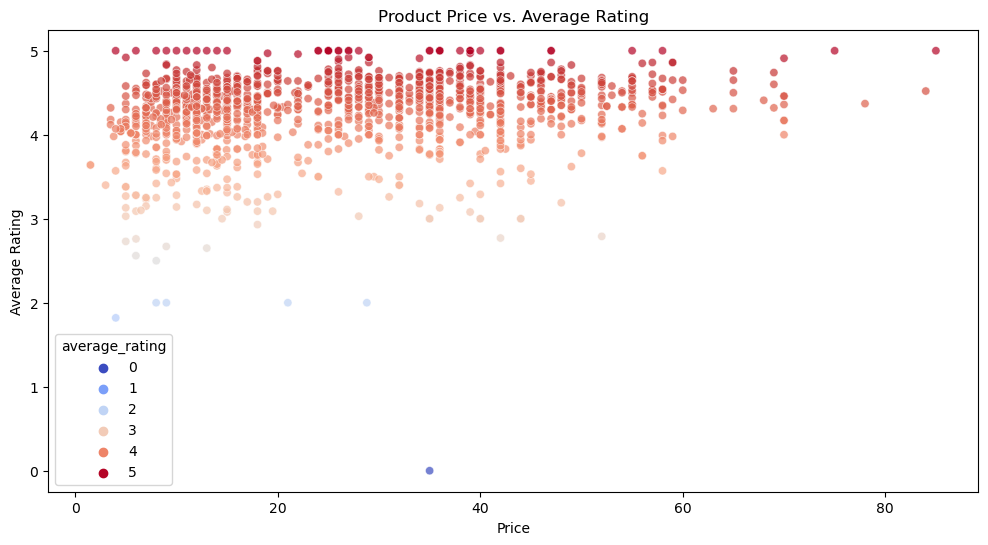

In [15]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=products_df, x='price', y='average_rating', hue='average_rating', palette="coolwarm", alpha=0.7)
plt.title('Product Price vs. Average Rating')
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.show()

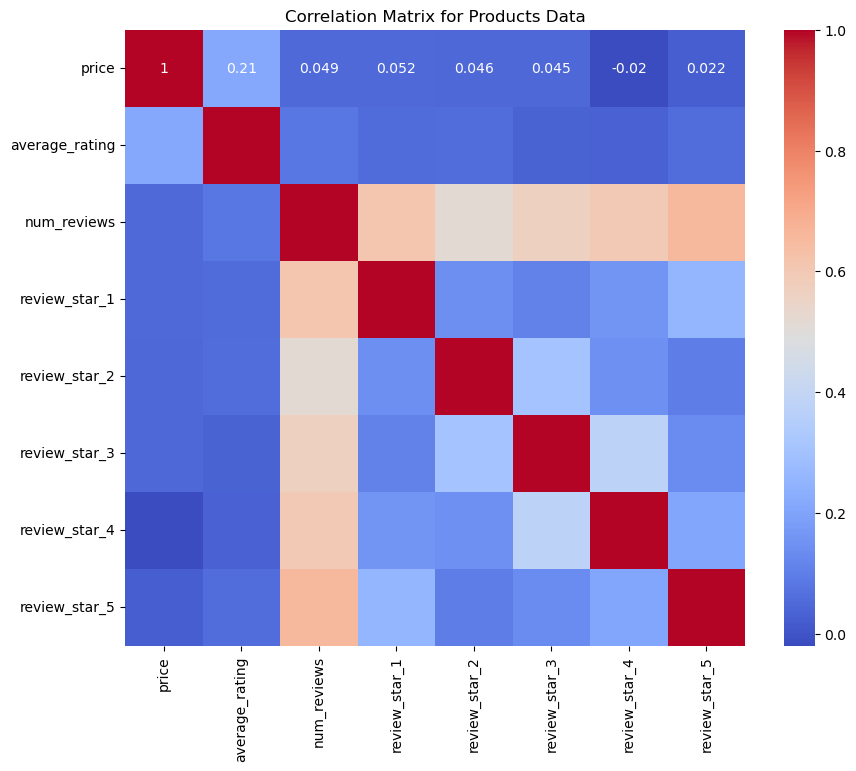

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(products_df[['price', 'average_rating', 'num_reviews', 'review_star_1', 'review_star_2', 
                        'review_star_3', 'review_star_4', 'review_star_5']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Products Data')
plt.show()

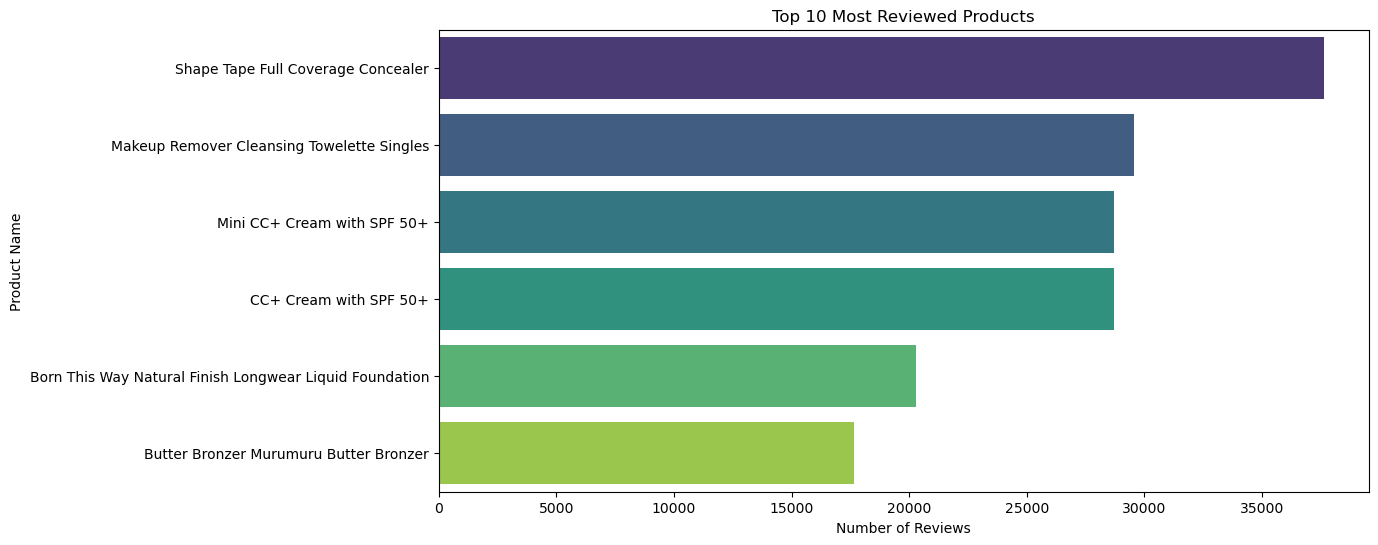

In [17]:
top_10_products = products_df.nlargest(10, 'num_reviews')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, y='product_name', x='num_reviews', palette='viridis')
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

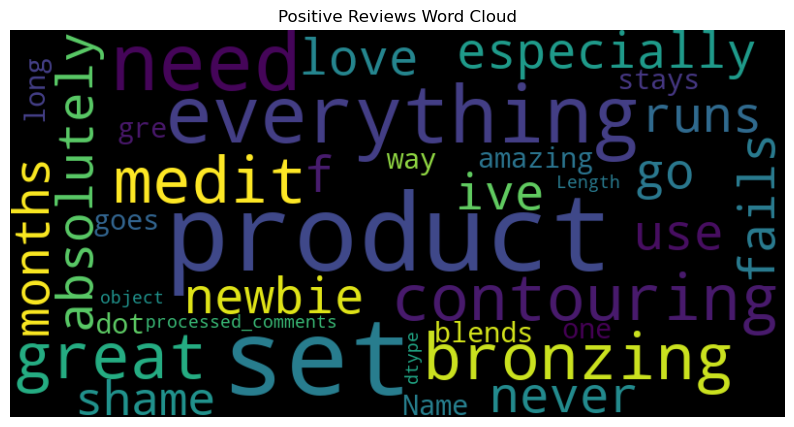

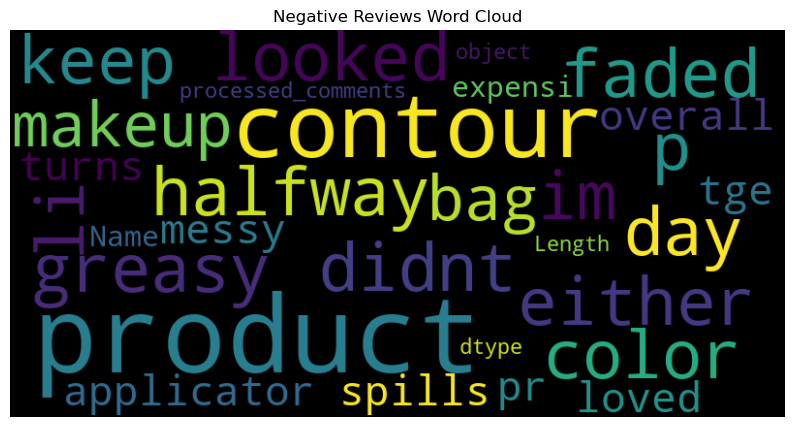

In [8]:
positive_reviews = reviews_df[reviews_df['rating'] >= 4]['processed_comments']
negative_reviews = reviews_df[reviews_df['rating'] < 4]['processed_comments']
plot_wordcloud(positive_reviews, "Positive Reviews Word Cloud")
plot_wordcloud(negative_reviews, "Negative Reviews Word Cloud")